In [11]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog5.csv')
df = df[df['Year'] == 2019]
df = df.drop(['NBATRB', 'NBAAST', 'NBASTL', 'NBABLK','NBAPTS', 'Pk', 'Year', 'Pos', '#', 'Wins', 'Losses', 'Pts', 'Rbds','Unnamed: 0','Offense', 'Defense', 'Diff'], axis=1)
df.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
559,Zion Williamson,Duke,33.0,30.0,9.0,13.2,0.680,8.2,11.0,0.747,...,6.2,0.640,8.9,2.1,2.1,1.8,2.4,2.1,22.6,11.97
560,Jaxson Hayes,Texas,32.0,23.3,3.8,5.3,0.728,3.8,5.3,0.728,...,3.1,0.740,5.0,0.3,0.6,2.2,0.9,3.3,10.0,11.46
561,Nickeil Alexander-Walker,Virginia Tech,67.0,29.9,4.7,10.1,0.464,3.0,5.6,0.529,...,3.1,0.763,4.0,2.7,1.4,0.5,2.2,1.9,13.5,7.25
562,RJ Barrett,Duke,38.0,35.3,8.4,18.5,0.454,6.5,12.2,0.529,...,5.9,0.665,7.6,4.3,0.9,0.4,3.2,1.8,22.6,11.97
563,Ignas Brazdeikis,Michigan,37.0,29.6,5.1,11.0,0.462,3.6,7.1,0.500,...,4.1,0.773,5.4,0.8,0.7,0.5,1.2,2.1,14.8,10.55


In [12]:
df1 = df.set_index('Name')
df2 = df1.copy(deep=True)
df2 = df2.drop(['School'], axis=1)
df2.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,33.0,30.0,9.0,13.2,0.680,8.2,11.0,0.747,0.7,2.2,...,6.2,0.640,8.9,2.1,2.1,1.8,2.4,2.1,22.6,11.97
Jaxson Hayes,32.0,23.3,3.8,5.3,0.728,3.8,5.3,0.728,0.0,0.0,...,3.1,0.740,5.0,0.3,0.6,2.2,0.9,3.3,10.0,11.46
Nickeil Alexander-Walker,67.0,29.9,4.7,10.1,0.464,3.0,5.6,0.529,1.7,4.5,...,3.1,0.763,4.0,2.7,1.4,0.5,2.2,1.9,13.5,7.25
RJ Barrett,38.0,35.3,8.4,18.5,0.454,6.5,12.2,0.529,1.9,6.2,...,5.9,0.665,7.6,4.3,0.9,0.4,3.2,1.8,22.6,11.97
Ignas Brazdeikis,37.0,29.6,5.1,11.0,0.462,3.6,7.1,0.500,1.5,3.9,...,4.1,0.773,5.4,0.8,0.7,0.5,1.2,2.1,14.8,10.55


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
df2.dropna()
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


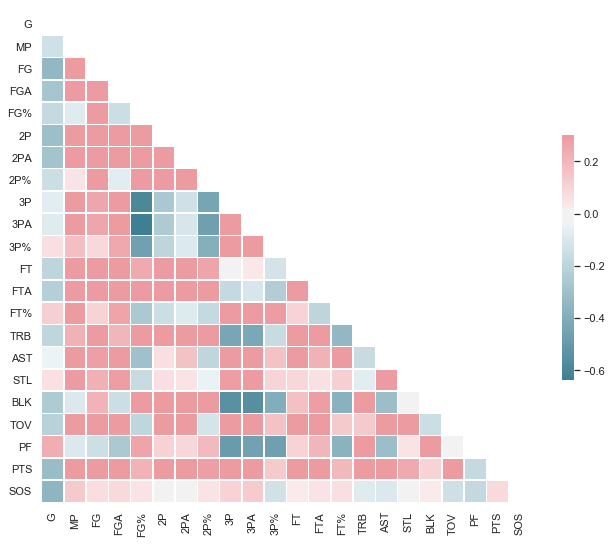

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D 

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

## Data Clustering

In [15]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [16]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
subSpace = TSNE().fit_transform(df2.values)
#subSpace = PCA().fit_transform(df3.values)

### K-Means

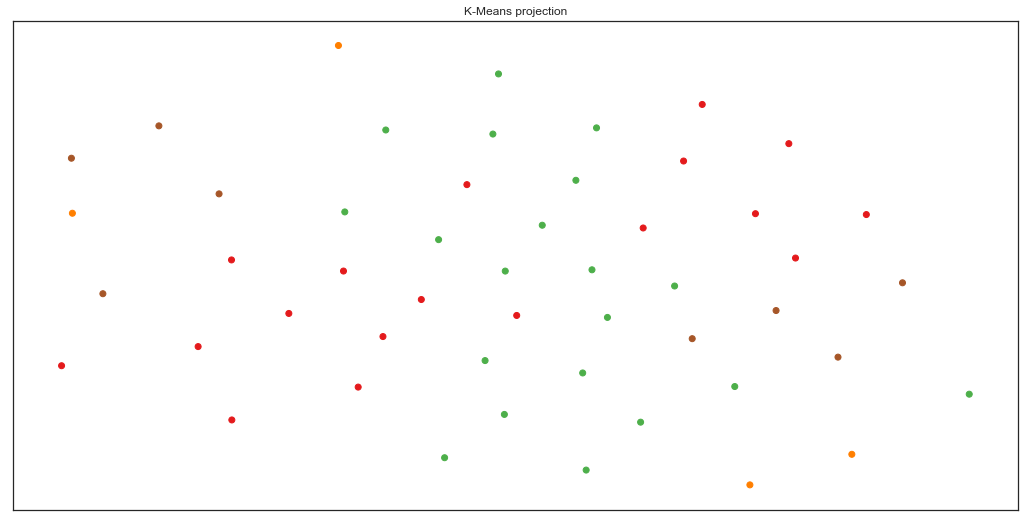

In [28]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=4, max_iter= 10000, n_init=100).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'K-Means projection',4)

In [29]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,-1.108943,0.492341,2.961429,1.203738,2.574998,3.247239,2.042969,2.992583,-0.659698,-0.536341,...,-1.323586,2.028241,-0.078765,2.426820,1.438938,0.739072,-0.129021,2.445555,1.005805,2
Jaxson Hayes,-1.136891,-0.969842,-0.738578,-1.731302,3.222593,0.101521,-0.684179,2.721954,-1.629841,-1.675289,...,-0.011286,-0.144874,-1.300982,-0.950017,2.005448,-1.629748,2.147826,-0.936139,0.899567,3
Nickeil Alexander-Walker,-0.158740,0.470517,-0.098193,0.052013,-0.339178,-0.470428,-0.540645,-0.112525,0.726222,0.654378,...,0.290543,-0.702083,0.328641,0.850963,-0.402223,0.423229,-0.508496,0.003221,0.022581,1
RJ Barrett,-0.969208,1.648993,2.534505,3.172814,-0.474093,2.031848,2.617105,-0.112525,1.003405,1.534474,...,-0.995511,1.303869,1.415056,-0.274649,-0.543850,2.002443,-0.698233,2.445555,1.005805,2
Ignas Brazdeikis,-0.997155,0.405047,0.186423,0.386385,-0.366161,-0.041466,0.177025,-0.525589,0.449038,0.343755,...,0.421773,0.078009,-0.961477,-0.724894,-0.402223,-1.155984,-0.129021,0.352126,0.710005,1


In [30]:
name = 'Zion Williamson'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,-1.108943,0.492341,2.961429,1.203738,2.574998,3.247239,2.042969,2.992583,-0.659698,-0.536341,...,-1.323586,2.028241,-0.078765,2.426820,1.438938,0.739072,-0.129021,2.445555,1.005805,2
RJ Barrett,-0.969208,1.648993,2.534505,3.172814,-0.474093,2.031848,2.617105,-0.112525,1.003405,1.534474,...,-0.995511,1.303869,1.415056,-0.274649,-0.543850,2.002443,-0.698233,2.445555,1.005805,2
Brandon Clarke,-0.997155,0.077692,1.467195,0.052013,2.669439,2.246329,1.420988,2.394351,-1.491249,-1.468208,...,-0.614944,1.861078,-0.214567,0.400718,3.421726,-0.682220,-0.129021,0.915741,-0.444034,2
Bol Bol,-1.779675,0.448694,2.392197,1.761023,0.969503,2.246329,2.473571,0.471464,0.310446,-0.225719,...,0.211805,2.418287,-0.825676,-0.499772,2.713587,0.107387,-0.887970,2.016134,-0.210727,2


### Agglomeative Clustering

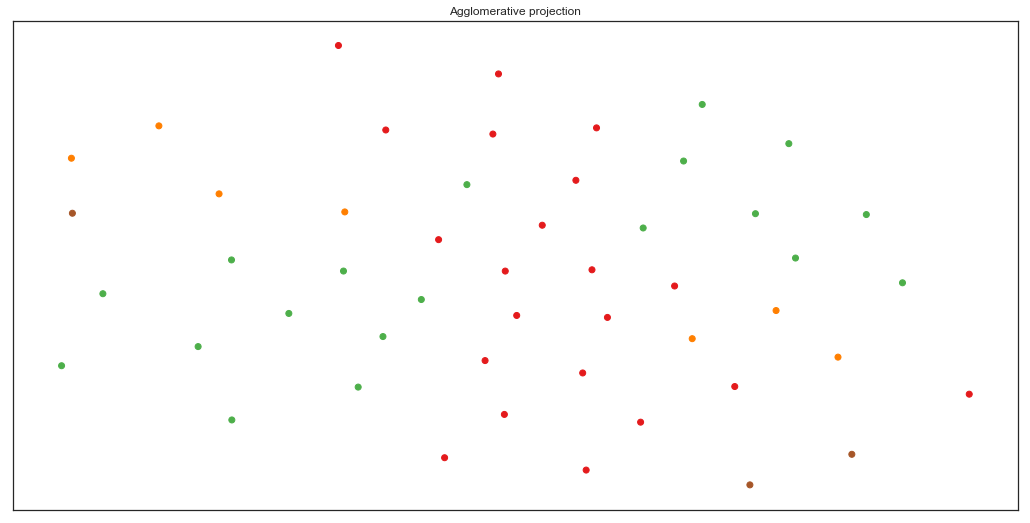

In [31]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'Agglomerative projection',4)

In [32]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,-1.108943,0.492341,2.961429,1.203738,2.574998,3.247239,2.042969,2.992583,-0.659698,-0.536341,...,-1.323586,2.028241,-0.078765,2.426820,1.438938,0.739072,-0.129021,2.445555,1.005805,3
Jaxson Hayes,-1.136891,-0.969842,-0.738578,-1.731302,3.222593,0.101521,-0.684179,2.721954,-1.629841,-1.675289,...,-0.011286,-0.144874,-1.300982,-0.950017,2.005448,-1.629748,2.147826,-0.936139,0.899567,2
Nickeil Alexander-Walker,-0.158740,0.470517,-0.098193,0.052013,-0.339178,-0.470428,-0.540645,-0.112525,0.726222,0.654378,...,0.290543,-0.702083,0.328641,0.850963,-0.402223,0.423229,-0.508496,0.003221,0.022581,0
RJ Barrett,-0.969208,1.648993,2.534505,3.172814,-0.474093,2.031848,2.617105,-0.112525,1.003405,1.534474,...,-0.995511,1.303869,1.415056,-0.274649,-0.543850,2.002443,-0.698233,2.445555,1.005805,0
Ignas Brazdeikis,-0.997155,0.405047,0.186423,0.386385,-0.366161,-0.041466,0.177025,-0.525589,0.449038,0.343755,...,0.421773,0.078009,-0.961477,-0.724894,-0.402223,-1.155984,-0.129021,0.352126,0.710005,0


In [33]:
name = 'Zion Williamson'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,-1.108943,0.492341,2.961429,1.203738,2.574998,3.247239,2.042969,2.992583,-0.659698,-0.536341,...,-1.323586,2.028241,-0.078765,2.426820,1.438938,0.739072,-0.129021,2.445555,1.005805,3
Brandon Clarke,-0.997155,0.077692,1.467195,0.052013,2.669439,2.246329,1.420988,2.394351,-1.491249,-1.468208,...,-0.614944,1.861078,-0.214567,0.400718,3.421726,-0.682220,-0.129021,0.915741,-0.444034,3
Bol Bol,-1.779675,0.448694,2.392197,1.761023,0.969503,2.246329,2.473571,0.471464,0.310446,-0.225719,...,0.211805,2.418287,-0.825676,-0.499772,2.713587,0.107387,-0.887970,2.016134,-0.210727,3


### Affinity Propagation

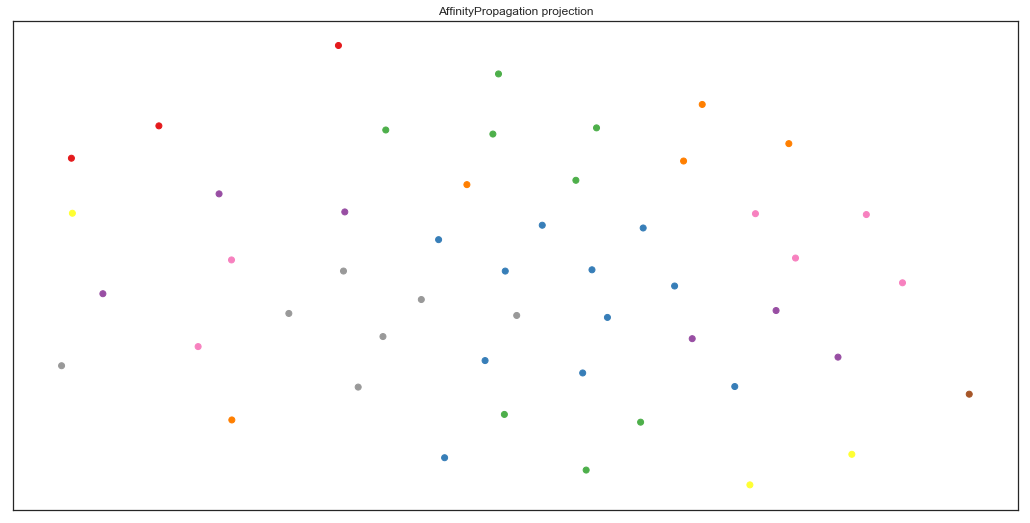

In [39]:
from sklearn.cluster import AffinityPropagation
cluster = AffinityPropagation(convergence_iter=15).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'AffinityPropagation projection',10)

In [40]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,-1.108943,0.492341,2.961429,1.203738,2.574998,3.247239,2.042969,2.992583,-0.659698,-0.536341,...,-1.323586,2.028241,-0.078765,2.426820,1.438938,0.739072,-0.129021,2.445555,1.005805,6
Jaxson Hayes,-1.136891,-0.969842,-0.738578,-1.731302,3.222593,0.101521,-0.684179,2.721954,-1.629841,-1.675289,...,-0.011286,-0.144874,-1.300982,-0.950017,2.005448,-1.629748,2.147826,-0.936139,0.899567,0
Nickeil Alexander-Walker,-0.158740,0.470517,-0.098193,0.052013,-0.339178,-0.470428,-0.540645,-0.112525,0.726222,0.654378,...,0.290543,-0.702083,0.328641,0.850963,-0.402223,0.423229,-0.508496,0.003221,0.022581,2
RJ Barrett,-0.969208,1.648993,2.534505,3.172814,-0.474093,2.031848,2.617105,-0.112525,1.003405,1.534474,...,-0.995511,1.303869,1.415056,-0.274649,-0.543850,2.002443,-0.698233,2.445555,1.005805,1
Ignas Brazdeikis,-0.997155,0.405047,0.186423,0.386385,-0.366161,-0.041466,0.177025,-0.525589,0.449038,0.343755,...,0.421773,0.078009,-0.961477,-0.724894,-0.402223,-1.155984,-0.129021,0.352126,0.710005,2


In [41]:
name = 'Zion Williamson'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,-1.108943,0.492341,2.961429,1.203738,2.574998,3.247239,2.042969,2.992583,-0.659698,-0.536341,...,-1.323586,2.028241,-0.078765,2.426820,1.438938,0.739072,-0.129021,2.445555,1.005805,6
Brandon Clarke,-0.997155,0.077692,1.467195,0.052013,2.669439,2.246329,1.420988,2.394351,-1.491249,-1.468208,...,-0.614944,1.861078,-0.214567,0.400718,3.421726,-0.682220,-0.129021,0.915741,-0.444034,6
Bol Bol,-1.779675,0.448694,2.392197,1.761023,0.969503,2.246329,2.473571,0.471464,0.310446,-0.225719,...,0.211805,2.418287,-0.825676,-0.499772,2.713587,0.107387,-0.887970,2.016134,-0.210727,6
